/var/folders/db/mkhd3ldd611d0ncwt82ndwmr0000gn/T/ipykernel_89181/2352993835.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(x='prev_iti', y=shift_or_stay, data=subset, ci=68, capsize=.1, palette='viridis')
/var/folders/db/mkhd3ldd611d0ncwt82ndwmr0000gn/T/ipykernel_89181/2352993835.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='prev_iti', y=shift_or_stay, data=subset, ci=68, capsize=.1, palette='viridis')


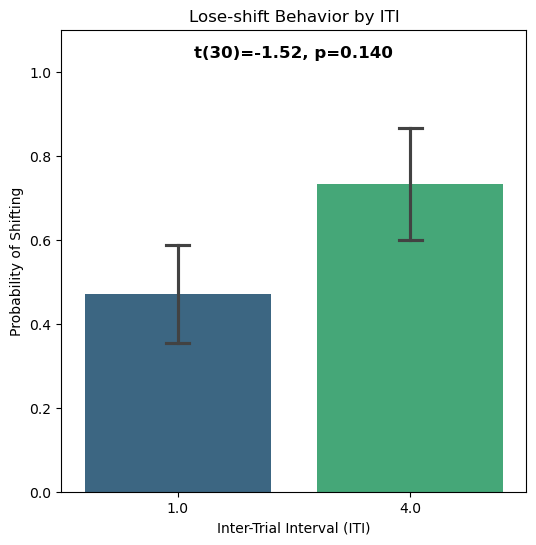

/var/folders/db/mkhd3ldd611d0ncwt82ndwmr0000gn/T/ipykernel_89181/2352993835.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(x='prev_iti', y=shift_or_stay, data=subset, ci=68, capsize=.1, palette='viridis')
/var/folders/db/mkhd3ldd611d0ncwt82ndwmr0000gn/T/ipykernel_89181/2352993835.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='prev_iti', y=shift_or_stay, data=subset, ci=68, capsize=.1, palette='viridis')


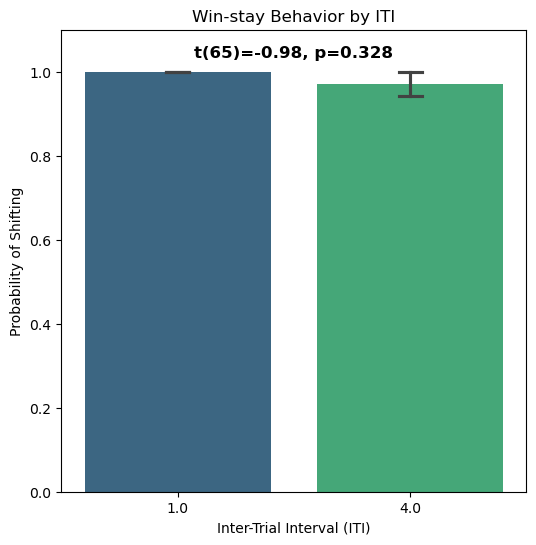

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the data
df = pd.read_csv('practice_paul_results.csv')

# Preprocessing: Shift columns to align trial t with outcome of t-1
df['prev_reward'] = df['reward'].shift(1)
df['prev_choice'] = df['choice'].shift(1)
df['prev_iti'] = df['iti'].shift(1)

def analyze_and_plot(df, prev_reward_val,shift_or_stay,title_prefix, filename):
    # Filter for the specific previous outcome (Win=1 or Loss=-1)
    subset = df[df['prev_reward'] == prev_reward_val].copy()
    
    # Calculate Shift: 1 if choice changed, 0 if choice stayed
    subset['shift'] = (subset['choice'] != subset['prev_choice']).astype(int)
    subset['stay'] = (subset['choice'] == subset['prev_choice']).astype(int)
    # Identify the groups (ITI 1 vs ITI 4)
    # We use independent t-test to compare the trials of condition A vs condition B for this subject
    group1 = subset[subset['prev_iti'] == 1.0]['shift']
    group2 = subset[subset['prev_iti'] == 4.0]['shift']
    
    # Perform t-test
    t_stat, p_val = ttest_ind(group1, group2)
    
    # Plotting
    plt.figure(figsize=(6, 6))
    ax = sns.barplot(x='prev_iti', y=shift_or_stay, data=subset, ci=68, capsize=.1, palette='viridis')
    
    plt.title(f'{title_prefix}-{shift_or_stay} Behavior by ITI')
    plt.xlabel('Inter-Trial Interval (ITI)')
    plt.ylabel('Probability of Shifting')
    plt.ylim(0, 1.1)
    
    # Annotate with stats
    stat_msg = f"t({len(group1)+len(group2)-2})={t_stat:.2f}, p={p_val:.3f}"
    plt.text(0.5, 0.95, stat_msg, ha='center', va='center', transform=ax.transAxes, fontsize=12, fontweight='bold')
    
    plt.savefig(filename)
    plt.show()

# Generate Lose-Shift Plot
analyze_and_plot(df, -1, 'shift',"Lose", "lose_shift_ttest.png")

# Generate Win-Shift Plot
analyze_and_plot(df, 1, 'stay',"Win", "win_shift_ttest.png")

Mean Accuracy: 0.56
T-test vs 0.33: t=4.543441112511215, p=1.564903066383855e-05


<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
/var/folders/db/mkhd3ldd611d0ncwt82ndwmr0000gn/T/ipykernel_89181/1206288248.py:44: SyntaxWarning: invalid escape sequence '\d'
  df['best_option'] = df[['p1', 'p2', 'p3']].idxmax(axis=1).str.extract('(\d+)').astype(int)


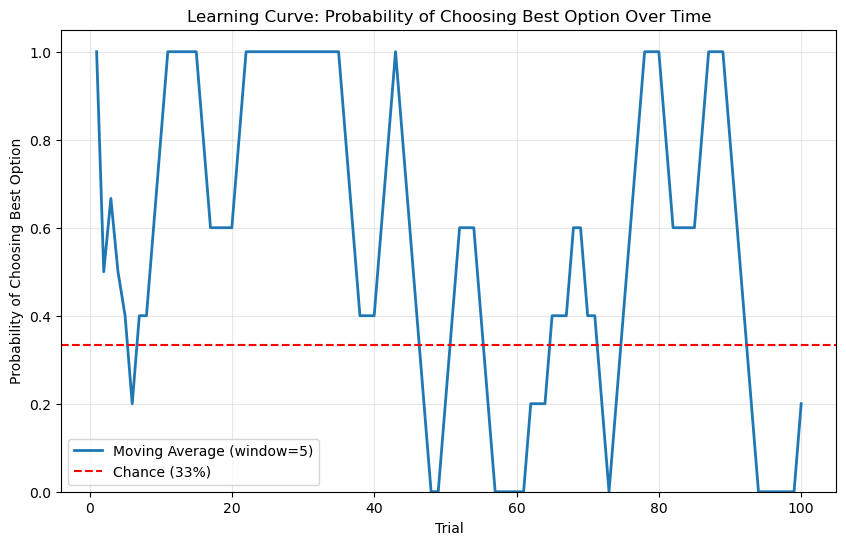

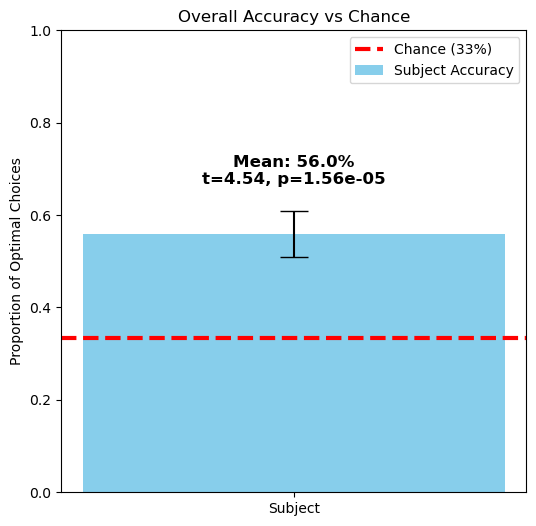

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('practice_paul_results.csv')

# Determine the best option for each trial
# p1 corresponds to choice 1, p2 to choice 2, p3 to choice 3
# argmax gives 0, 1, 2. Add 1 to get 1, 2, 3.
probs = df[['p1', 'p2', 'p3']]
df['best_option'] = probs.idxmax(axis=1).str.replace('p', '').astype(int)

# Determine if the subject chose the best option
df['chose_best'] = (df['choice'] == df['best_option']).astype(int)

# --- Plot 1: Learning Curve ---
# We'll use a rolling window to smooth the binary data into a probability curve
window_size = 5
df['rolling_accuracy'] = df['chose_best'].rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['trial'], df['rolling_accuracy'], label=f'Moving Average (window={window_size})', linewidth=2)
plt.axhline(y=1/3, color='r', linestyle='--', label='Chance (33%)')
plt.title('Learning Curve: Probability of Choosing Best Option Over Time')
plt.xlabel('Trial')
plt.ylabel('Probability of Choosing Best Option')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('learning_curve.png')

# --- Plot 2: Overall % Choosing Best Option ---
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Load data
df = pd.read_csv('practice_paul_results.csv')

# Determine the best option
# Columns are p1, p2, p3. Their indices in the list are 0, 1, 2. We want 1, 2, 3.
# idxmax returns 'p1', 'p2', etc. We extract the digit.
df['best_option'] = df[['p1', 'p2', 'p3']].idxmax(axis=1).str.extract('(\d+)').astype(int)

# Boolean for correct choice
df['chose_best'] = (df['choice'] == df['best_option']).astype(int)

# One-sample t-test against chance (1/3)
chance_rate = 1/3
t_stat, p_val = ttest_1samp(df['chose_best'], popmean=chance_rate)

# Calculate mean and standard error for error bar
mean_acc = df['chose_best'].mean()
sem_acc = df['chose_best'].sem()

print(f"Mean Accuracy: {mean_acc}")
print(f"T-test vs {chance_rate:.2f}: t={t_stat}, p={p_val}")

# Plotting
plt.figure(figsize=(6, 6))

# Bar plot with error bar (SEM)
# We plot a single bar. x-position 0.
plt.bar(x=0, height=mean_acc, yerr=sem_acc, color='skyblue', width=0.5, capsize=10, label='Subject Accuracy')

# Chance line
plt.axhline(y=chance_rate, color='r', linestyle='--', linewidth=3, label='Chance (33%)')

# Annotations
plt.title('Overall Accuracy vs Chance')
plt.ylabel('Proportion of Optimal Choices')
plt.xticks([0], ['Subject'])
plt.ylim(0, 1.0)
plt.legend()

# Add text for stats
# Place it above the error bar
text_y = mean_acc + sem_acc + 0.05
if text_y > 0.9: text_y = 0.9
plt.text(0, text_y, f"Mean: {mean_acc:.1%}\nt={t_stat:.2f}, p={p_val:.2e}", 
         ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.savefig('overall_best_choice_ttest.png')

Unique ITIs: [1 4]
     count    mean         std    min     25%    50%     75%     max
iti                                                                 
1     50.0  456.54  187.054091  310.0  357.00  394.5  470.00  1280.0
4     50.0  445.92  193.716903  265.0  340.25  383.0  460.75  1213.0
T-test results: t=0.27886511021140353, p=0.7809359576627984


/var/folders/db/mkhd3ldd611d0ncwt82ndwmr0000gn/T/ipykernel_89181/2384652138.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='iti', y='rt', data=df, palette='viridis')


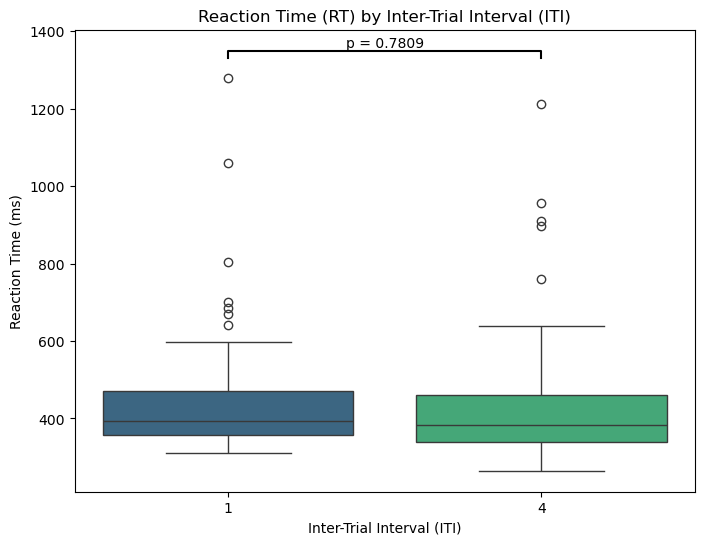

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load data
df = pd.read_csv('practice_paul_results.csv')

# Check unique ITIs
itis = df['iti'].unique()
print(f"Unique ITIs: {itis}")

# Group by ITI and describe RT
print(df.groupby('iti')['rt'].describe())

# Statistical Test
# Assuming two groups (1 and 4 based on previous context)
group1 = df[df['iti'] == 1]['rt']
group2 = df[df['iti'] == 4]['rt']

t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test results: t={t_stat}, p={p_val}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='iti', y='rt', data=df, palette='viridis')
plt.title('Reaction Time (RT) by Inter-Trial Interval (ITI)')
plt.xlabel('Inter-Trial Interval (ITI)')
plt.ylabel('Reaction Time (ms)')

# Add statistical annotation
y_max = df['rt'].max()
y_min = df['rt'].min()
# Add significance bar
x1, x2 = 0, 1   # columns (first and second)
y, h, col = y_max + 50, 20, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"p = {p_val:.4f}", ha='center', va='bottom', color=col)

plt.savefig('rt_by_iti.png')